# Preliminary operations

In [ ]:
!pip install contractions
!pip install emoji

In [ ]:
# Utility
from google.colab import drive
import pandas as pd
pd.set_option('display.max_rows', 500)
from shutil import copyfile
from collections import Counter
import copy
import datetime
import ast
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# String operations
import re
import contractions
import string
from emoji import demojize
from textblob import TextBlob

# Nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import FreqDist

In [ ]:
drive.mount('/content/gdrive')

# Data exploration

Let's explore our data.

In [ ]:
df = pd.read_csv('gdrive/My Drive/Text Mining & Search/preprocessed.csv')
df.head()

,Datetime,Text,Username,Likes,Retweets,Hashtags,Mentions
0,2022-12-18 23:57:22+00:00,"despite conceding 3️⃣ goals apiece, &amp; hugo...",JioCinema,58,15,"['FIFAWorldCup', 'ARGFRA', 'Qatar2022', 'FIFAW...","['emimartinezz1', 'Mahindra_Auto']"
1,2022-12-18 23:54:59+00:00,"12/18/2022 - 📍times square, nyc argentina beat...",galassitweets,13,2,"['FIFAWorldCup', 'ArgentinaVsFrance', 'Qatar20...",[]
2,2022-12-18 23:54:52+00:00,"and at 2:52am on monday, december 19, it's a w...",gabetan13,28,0,"['FIFAWorldCup', 'Qatar2022']",[]
3,2022-12-18 23:54:48+00:00,would the question be even asked if it was ano...,farjad99,16,3,['WorldcupQatar2022'],['IlmFeed']
4,2022-12-18 23:53:22+00:00,"""it is a dress for an official occasion, worn ...",ShamoonHafez,920,113,"['Qatar2022', 'FifaWorldCup']",[]


In [ ]:
# Demojizing
df['Text'] = df['Text'].apply(lambda x: demojize(x, delimiters = (' _', '_ ')).lower())
print(df['Text'].head())

0    despite conceding  _keycap_3_  goals apiece, &...
1    12/18/2022 -  _round_pushpin_ times square, ny...
2    and at 2:52am on monday, december 19, it's a w...
3    would the question be even asked if it was ano...
4    "it is a dress for an official occasion, worn ...
Name: Text, dtype: object


## Basic features

First of all, we may explore some basic features:
*   Number of tweets.
*   Number of sentences.
*   Average number of sentences for each tweet.
*   Number of words.
*   Average number of words for each tweet.
*   Number of unique words.
*   Ratio between unique words and words.

In [25]:
print('Total number of tweets: ' + str(len(df)))
text = '. '.join(''.join(x) for x in df['Text']).strip()
text = text.replace("..", ".")
sentences = sent_tokenize(text)
print('Total number of sentences: ' + str(len(sentences)))
print('Average number of sentences for each tweet: ' + str(len(sentences)/len(df)))
words = 0
x = []
for tweet in df['Text']:
  words+=len(tweet.split())
  x.extend(tweet.split())
unique = len(set(x))
print('Total number of words: ' + str(words))
print('Average number of words for each tweet: ' + str(words/len(df)))
print('Total number of unique words: ' + str(unique))
print('Ratio between unique words and words: ' + str(unique/words))

Total number of tweets: 89261
Total number of sentences: 180170
Average number of sentences for each tweet: 2.01846271047826
Total number of words: 2256636
Average number of words for each tweet: 25.281321069672085
Total number of unique words: 105242
Ratio between unique words and words: 0.046636675121729865


## Hashtags-cloud

Now, let's have a look at the distribution of the hashtags.

In [ ]:
hashtag_lists = df['Hashtags'].tolist()

In [ ]:
for i in range(len(hashtag_lists)):
  hashtag_lists[i] = hashtag_lists[i].replace('"', '').replace('[', '').replace(']', '').replace("'", '')
  hashtag_lists[i] = hashtag_lists[i].split(', ')

In [ ]:
hashtag_list = hashtag_lists[0]
for i in range(1, len(hashtag_lists)):
  hashtag_list+=hashtag_lists[i]

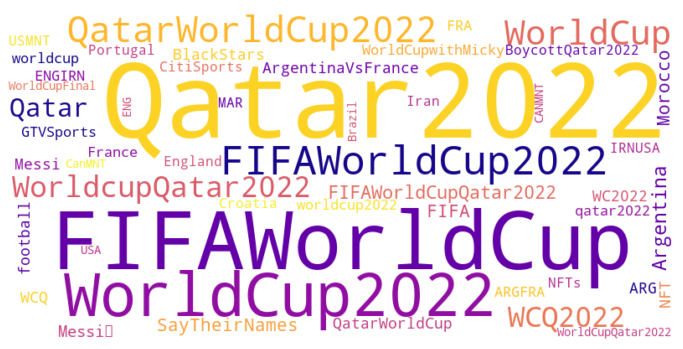

In [ ]:
fdist = FreqDist(hashtag_list)

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

In addition to the more generic hashtags, we can note the presence of *#Argentina* and *#Messi* (winners of the competition), *#Morocco* (the tournament's revelation team) and *#BoycottQatar* (this World Cup was one of the most contested ever).

## Mentions-cloud

Now we visualize the most cited twitter profiles.

In [ ]:
mention_lists = df['Mentions'].tolist()

In [ ]:
mention_list = ast.literal_eval(mention_lists[0])
for i in range(1, len(mention_lists)):
  mention_list+=ast.literal_eval(mention_lists[i])

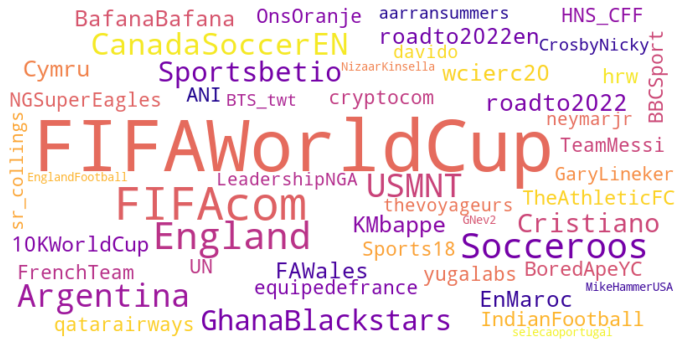

In [ ]:
fdist = FreqDist(mention_list)

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

The most mentioned users are journalists, football players and TV channels. Specifically, the football players most cited are Neymar, Cristiano Ronaldo, Lionel Messi and Kylian Mbappe, the 4-stars of this tournament. Moreover, we can notice the particular presence of *GhanaBlackstars* (Ghana almost qualified to the round of 16 after a spectacular match against South Corea) and *Socceroos* (the Australian team passed the first turn with the same points as France).

## Users-cloud

Now, let's have a look at the users with more likes.

In [ ]:
df_likes = df.sort_values(by = ['Likes'], ascending = False)[:3000]

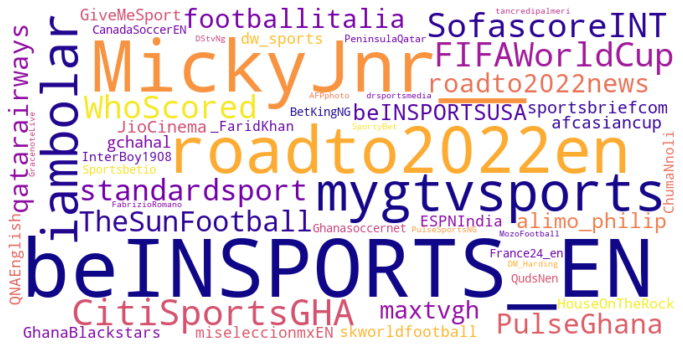

In [ ]:
fdist = FreqDist(df['Username'])

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

Users with more retweets.

In [ ]:
df_retweets = df.sort_values(by = ['Retweets'], ascending = False)[:3000]

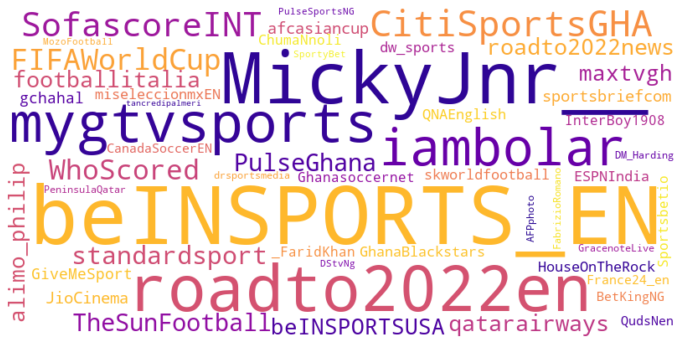

In [ ]:
fdist = FreqDist(df['Username'])

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

The users with more likes and retweets are journalists, TV channels and Qatar accounts like *qatarairways* and *PeninsulaQatar*. However, we can notice an uncommon (for a World Cup) presence of African accounts (CitiSportsGHA, PulseGhana or MickyJnr__, who is the leading African football journalist), sign of the extraordinary performances of African teams, first of all Morocco.

## Words-cloud

In this subsection we explore the most frequently used words.

First of all, we need a bit of pre-process in order to remove punctuations and stop words from the count.

In [ ]:
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))

In [ ]:
df['Text'] = df['Text'].apply(lambda x: contractions.fix(x))
print(df['Text'].head())

0    despite conceding  _keycap__  goals apiece, &a...
1    // -  _round_pushpin_ times square, nyc argent...
2       and at :am on monday, december , it is a wrap!
3    would the question be even asked if it was ano...
4    "it is a dress for an official occasion, worn ...
Name: Text, dtype: object


In [ ]:
custom = list(string.punctuation)
custom.extend(['€', '‘', '–', '’', '|', '\\', '⏱', '↯', ' ⃣0⃣ ', ' ⃣', '↓',
               '•', '“', '”', '…', "'⃣", '◘'])
custom.remove("'")
custom.remove('-')
custom.remove('_')

def remove_punctuation(text, punct):
  punctuation_free = ''.join([i for i in text if i not in punct])
  return punctuation_free

def remove_custom(text):
  custom = re.sub("(')|(-)", ' ', text)
  return custom

df['Text'] = df['Text'].apply(lambda x: remove_punctuation(x, custom))
df['Text'] = df['Text'].apply(lambda x: remove_custom(x))
print(df['Text'].head())

0    despite conceding  _keycap__  goals apiece amp...
1        _round_pushpin_ times square nyc argentina...
2           and at am on monday december  it is a wrap
3    would the question be even asked if it was ano...
4    it is a dress for an official occasion worn fo...
Name: Text, dtype: object


In [ ]:
def remove_extra_spaces(text):
  new_text = ' '.join(text.split()) 
  return new_text

df['Text'] = df['Text'].apply(lambda x: remove_extra_spaces(x))

spaces = 0
newlines = 0
tabs = 0
length = 0

for i in range(0, len(df)):
  spaces+=len(re.findall(r'\s\s+', df['Text'][i]))
  newlines+=len(re.findall(r'\n\n+', df['Text'][i]))
  tabs+=len(re.findall(r'\t+', df['Text'][i]))
  length+=len(df['Text'][i])

print("Number of multiple spaces:", spaces)
print("Number of multiple newlines:", newlines)
print("Number of multiple tabs:", tabs)
print('Overall tweets length:', length)

Number of multiple spaces: 0
Number of multiple newlines: 0
Number of multiple tabs: 0
Overall tweets length: 13440375


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['b', 'c', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'n', 'p', 'q', 'r', 'u', '&amp ;'
                  'w', 'z', 'amp', 'ha', 'le', 'u', 'wa', 'doe', '_', '_keycap_', '__', '_fire_',
                  '&amp', '_keycap__', 'keycap', 'im', 'ha', 'ah', 'wa', '&', '_soccer_ball_'])

In [ ]:
word_lists = df['Text'].apply(lambda x: [item for item in x.split() if item not in stopwords])

In [ ]:
word_list = word_lists[0]
for i in range(1, len(df)):
  word_list+=word_lists[i]

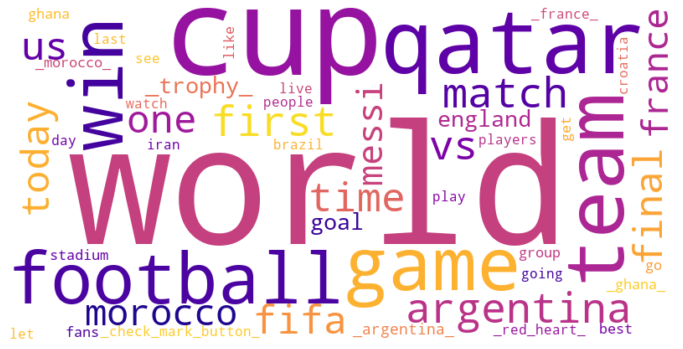

In [ ]:
fdist = FreqDist(word_list)

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

Once again, leaving out obvious words like *world*, *cup* or *qatar*, we can see words regarding the winner team (Argentina), but also words about African teams (Ghana and Morocco).

## Emoji-cloud

In this subsection we explore the most frequently used emojis.

In [ ]:
emoji_lists = word_list

In [ ]:
emoji_list = []
for i in range(0, len(word_list)):
  if '_' in word_list[i]:
     emoji_list.append(word_list[i])

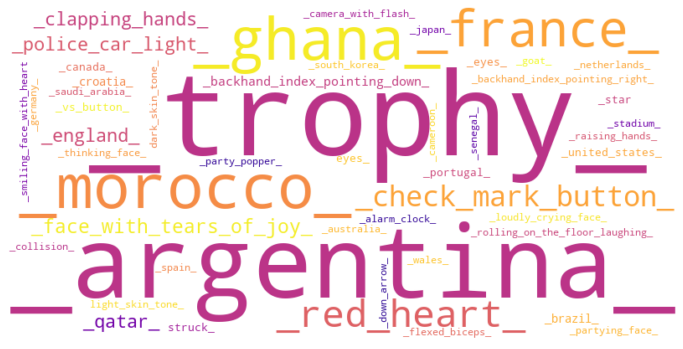

In [ ]:
fdist = FreqDist(emoji_list)

wc = WordCloud(width = 800, height = 400, max_words = 50, background_color = 'white', colormap = 'plasma').generate_from_frequencies(fdist)
plt.figure(figsize = (12, 10))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

Again, seems like the African teams exploited this World Cup. However, we can notice also polemic emojis like *money_bag*, *party_pooper* or *loudly_crying_face*, another sign of the controversies of this World Cup.

## Time distribution

Now we visualize the time distribution of the tweets.

In [ ]:
times = [df['Datetime'][0][:10]]
for i in range(len(df)):
  times.append(df['Datetime'][i][:10])

In [ ]:
dist = Counter(reversed(times))

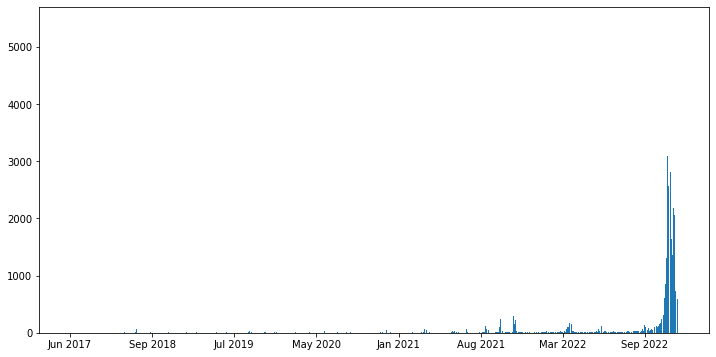

In [ ]:
plt.figure(figsize = (12, 6))
plt.bar(range(len(dist)), dist.values())
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400], ['Jun 2017', 'Sep 2018', 'Jul 2019', 'May 2020', 'Jan 2021', 'Aug 2021', 'Mar 2022', 'Sep 2022'])
plt.show()

The number of tweets is obviously higher in the period close to the World Cup. However, we notice some peaks on March 2022 and September 2021. Let's zoom.

### September 2021

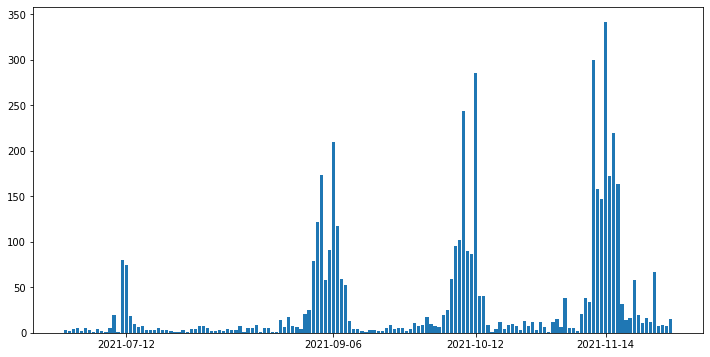

In [ ]:
plt.figure(figsize = (12, 6))
plt.bar((range(950, 1100)), list(dist.values())[950:1100])
plt.xticks([965, 1016, 1051, 1083], ['2021-07-12', '2021-09-06', '2021-10-12', '2021-11-14'])
plt.show()

Let's see what happened those days.

In [ ]:
x = df[df['Datetime'].str.contains('2021-07-12')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%10 == 0):
    display(x['Text'][i])

'it is time to join us in boycotting the qatar world cup stand against human rights violations be on the right side of history'

'lads done us proud they represented their country with dignity played a fair game and can hold their heads high looking forward to next chapter _clapping_hands_medium light_skin_tone_ _england_ _clapping_hands_medium light_skin_tone_'

'in my mind you did win last night you amp the whole team won the hearts of the nation amp the respect of so many around the _globe_showing_americas_ you beat critics you beat racists you beat the doubters amp you won a whole new set of fans who will be there supporting you next year'

'hard luck to the three lions _england_ and congratulations to italy _italy_ a sad ending for england to an otherwise impressive tournament promising signs from southgate and the squad though looking forward to their performance at the world cup'

'what a tournament it is been ending with disappointment but this team did us very proud we go to qatar in months stronger than ever _england_ _lion_ _lion_ _lion_'

'got to spend time with my pals amp my boy following the team _raising_hands_ it is been a pleasure _red_heart_ we go again _lion_ _lion_ _lion_'

'good moaning apes all roads lewd to rome do not they very proud of the team italy deserved to win they were the best team right from the start disappointed but realistic roll on'

'i can totally see a world cup final with argentina and italy in is this happening'

**12/07/2021**: These tweets are mostly about Italy winning the Europeans. Also, we have a tweet regarding the boycotting of the tournament in Qatar.

In [ ]:
x = df[df['Datetime'].str.contains('2021-09-06')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%10 == 0):
    display(x['Text'][i])

'algerian national team training session in ahead of tuesday vs'

'if the blackstars was well managed with a professionally govern fa this could have been possible black stars dede ayew richard ofori ck akonnor'

'ft south africa ghana _soccer_ball_ bongokuhle hlongwane _south_africa_ south africa top group g with points _ghana_ the blackstars of ghana have failed to live up to expectations after the gfa s campaign to whip up public support amp love for the team'

'happy that our players speak vernac in interviews no need for the forced english regardless of comfort level with speaking it speak your tongue'

'south africa ghana _south_africa_ _soccer_ball_ goal south africa open the scoring against ghana with just minutes to play'

'_police_car_light_ world cup qualifiers africa _timer_clock_ minutes played _south_africa_ south africa _keycap__ _keycap__ ghana _ghana_ dede ayew off minutes to prove your worth young lads'

'do we really still want to play a in this awful place _flushed_face_ _backhand_index_pointing_down_medium light_skin_tone_ _backhand_index_pointing_down_medium light_skin_tone_ _backhand_index_pointing_down_medium light_skin_tone_ _thinking_face_'

'video was it an offside claim they had a legitimate goal disallowed watch this and make your own judgement asamoah gyan'

'south africa _south_africa_ ghana _ghana_ still an uneventful start to the match both teams cautious at the moment'

'south africa vs ghana in minutes drop your predictions'

'fifa have opened investigations into the suspended world cup qualifier between brazil and argentina _brazil_ _vs_button_ _argentina_'

'lukaku has scored goals in games and goals in caps for belgium can he match or break ronaldo s international record of goals before he retires'

'fifa grabbed all tv rights for the world cup qualifiers leaving us with nothing not even the national broadcaster ubc tv can air the uganda cranes game against mail it is that bad'

'helman mkhalele played for bafana bafana against ghana in the first match between the sides post readmission south africa won the game throwback'

'let us get behind african b _soccer_ball_ _soccer_ball_ sted punts _flexed_biceps_ with added value only a click away _slot_machine_'

'_police_car_light_ fifa world cup qualifiers _soccer_ball_ south africa v ghana _speaking_head_ we know how the nation loves the game amp how important this game is for the nation because we want to go to the world cup richard ofori _video_camera_ full presser'

'great way to start our world cup qualifier with points amp a clean sheet in front of our people _nigeria_ _eagle_'

'that second half response was a relief to see after a long stretch of uncertainty in the first half lack of a clinical touch and awareness in the final third showed but getting the chances was very important still must win on wednesday _red_heart_ _canada_ _soccer_ball_'

'substitution for canada _canada_ _play_button_ in atiba hutchinson _reverse_button_ out mark anthony kaye'

'doneil henry stays down after his leg drags behind him on a tackle comes off but seems set to come back on _canada_ _united_states_ usa'

'professional tackle on alphonso davies who is away unless taken down yellow card for brooks _canada_ _united_states_ usa'

**06/09/2021**: Tweets mostly about the African qualification for the World Cup.

In [ ]:
x = df[df['Datetime'].str.contains('2021-10-12')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%10 == 0):
    display(x['Text'][i])

'games victories goals and conceded i will say it out loud denmark is a serious contender for the trophy'

'we are living through soccer greatness right now how many more records can he break'

'ft scores bulgaria northern ireland denmark austria england hungary faroe islands scotland israel moldova lithuania switzerland portugal luxembourg sweden greece denmark book their place at the fifa world cup in qatar'

'at their lowest ebb in parken in june are through to with eight wins and not a single goal conceded incredible'

'sheffield _automobile_ east midlands _airplane_ barcelona _trolleybus_ andorra _trolleybus_ barcelona _airplane_ east midlands _automobile_ sheffield _bus_ wembley _raising_hands_medium light_skin_tone_ _england_ _lion_ _lion_ _lion_'

'_top_arrow_ the continue soaring _eagle_ _green_heart_ congratulations _clapping_hands_light_skin_tone_ _saudi_arabia_ _right_arrow_ points on the road to _globe_showing_americas_ _soccer_ball_'

'this is how ghana s _ghana_ group looks after the fourth round of world cup qualifiers returns on november'

'africa _trophy_ _alarm_clock_ ft _south_africa_ south africa _ethiopia_ ethiopia _soccer_ball_ kebede og south africa have gone back to the top of the group ghana dropped to second place see you all in november'

'gooal baghdad bounedjah scores to increase the tally for the fennec foxes niger _niger_ _algeria_ algeria'

'nice one job done in harare _handshake_medium light_skin_tone_ _zimbabwe_ _ghana_'

'an important victory for this afternoon with pukki creating history in the process _oncoming_fist_'

'ya ll look so happy at the stadium _pleading_face_ _soccer_ball_ may this pilot project succeed so we can get more numbers _flexed_biceps_dark_skin_tone_ _yellow_heart_ _green_heart_'

'senegal _senegal_ is the first country to secure a place in the fifa world cup qualifications play off after beating namibia _namibia_ this afternoon the teranga lions will be seeded during the play off draw'

'as i said after the zimbabwe game st leg the black stars will not lose any game again till the end of the qualifiers just remember this tweet all the pressure is on south africa now'

's group after ghana beat zimbabwe _ghana_ ghana pts _south_africa_ south africa pts _ethiopia_ ethiopia pts _zimbabwe_ zimbabwe pt south africa vs ethiopia'

'ft namibia _namibia_ senegal _senegal_ the teranga lions have clinched group h and the broke the first team to qualify for the third and final stage of the'

'zimbabwe _zimbabwe_ ghana _ghana_ thomas partey _soccer_ball_ alexander djiku has been stretched off and replaced by joseph aidoo'

'djiku booked in nd min yellow cards mean he will miss next game in ethiopia on nov'

'mapeza must be ruing his decision to swap arubi for shumba a replay from the goal shows he lost concentration judging from the timing of his reaction when partey struck the free kick some goalies could have tipped it over will not be shocked if he is subbed for arubi'

'half time zimbabwe _zimbabwe_ ghana _ghana_ thomas partey _soccer_ball_'

'deflected off the wall for corner kick _zimbabwe_ _ghana_'

'g _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ _soccer_ball_ l no thomas no partey from a free kick zimbabwe _zimbabwe_ _ghana_ ghana'

'the way kamaldeen sulemana cuts in from the left wing two times now causing problems for zimbabwe right back kutsanzira _soccer_ball_ _red_heart_'

'_police_car_light_ fifa world cup qualifier _soccer_ball_ zimbabwe v ghana _video_camera_ _candle_ _candle_ _candle_ _candle_ _candle_ _candle_ _crossed_fingers_ _crossed_fingers_ _crossed_fingers_ warriors'

'big day in will be the st team from to reach the final qualifying play off phase if they can beat and will follow suit if they beat later i will have the latest on on radio'

'didier six will not be on bench when guinea hosts morocco in rabat in group i of due to bacterial meningitis he is in hospital will be observed for more days before being discharged to join family in abidjan draws so far with home game in rabat i doubt they will win'

'_loudspeaker_ _loudspeaker_ black stars getting ready for zimbabwe _zimbabwe_ clash at pm'

'fifa world cup qualifier _soccer_ball_ zimbabwe _zimbabwe_ _vs_button_ _ghana_ ghana _stadium_ national sports stadium _round_pushpin_ harare _watch_ _trophy_ _television_ zbctv your predictions _down_arrow_'

'meet your pundits for the day zimbabwe vs ghana we are on at midday live on gtv sports amp gtv share your views here or on our whatsapp number'

**12/10/2021**: Other Tweets about the qualifiers.

In [ ]:
x = df[df['Datetime'].str.contains('2021-11-14')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%15 == 0):
    display(x['Text'][i])

'not mitrovic scoring a winner to qualify for against who will now have fight for a spot via the play offs _smiling_face_with_tear_ _hundred_points_ _fire_ respect _clapping_hands_medium dark_skin_tone_ _clapping_hands_medium dark_skin_tone_'

'how the black stars celebrated their win tonight _ghana_ _fire_ _fire_ have a feel of it _backhand_index_pointing_down_medium dark_skin_tone_ _backhand_index_pointing_down_medium dark_skin_tone_ _backhand_index_pointing_down_medium dark_skin_tone_'

'_spain_ congratulations on qualifying for _clapping_hands_ we are proud of you and _bat_ amunt _flexed_biceps_'

'you have to be kidding me score in the th minute to snatch the guaranteed spot in from the portuguese who never do any qualifying the east way now will be in the playoff round unbelievable'

'what portugal did not automatically qualify for the world cup but they ronaldo the goat how is that possible'

'head up _south_africa_ you have been one the bright lights of the campaign _flexed_biceps_ _globe_showing_europe africa_'

'full time cape coast stadium ghana _ghana_ _south_africa_ south africa _soccer_ball_ andre ayew ghana _ghana_ have made it to the final round of the'

'ft ghana bafana a ayew p _soccer_ball_ it is the end of the road for bafana bafana in the fifa world cup qualifiers'

'ghana south africa a mid pressure is been mounted on the black stars at the moment'

'percy tau doing everything on his own no support for him'

'dede ayew lamborghini wakaso ferrari jordan hyundai i with occasional overheating he is been good before he needs to bounce back give us that crystal palace goal some _folded_hands_ _weary_face_ _loudly_crying_face_'

'_billed_cap_ hats off to rui patrício who makes his th appearance for portugal tonight portugal vs serbia is just about to get underway on bein sports en watch now _backhand_index_pointing_right_'

'ghana south africa the black stars are creating some decent chances but are yet to get a goal'

'kick off at the cape coast stadium ghana _ghana_ _south_africa_ south africa'

'warm up time for the black stars _ghana_ kick off is at pm'

'football the game we all love is killing many amit magar barely years old is back in kathmandu with irreparable kidney damage he probably will join many who have lost their lives building the stadiums for the speak up workers rights are human rights'

'_greece_ official greece s starting eleven vs kosovo hatzidiakos back in the lineup tsimikas returns at lb mantalos drops down to central midfield replacing siopis pelkas deployed as the and douvikas paired upfront with masouras let us finish on a high'

'i want to see _ghana_ ghana v _congo_ _kinshasa_ dr congo in the play off round if we progress _grinning_face_'

'is not an outlier the _soccer_ball_ world cup has had a few other controversial hosts in the past like italy argentina and russia'

'the calmness here at the cape coast stadium _relieved_face_ the match will be live on gtvsports and gtv at pm _check_mark_button_'

'_police_car_light_ match day _police_car_light_ catch a do or die clash between ghana amp tonight at live on channel on dtt amp via'

'the last visiting captain to win a world cup qualifier in ghana was current liberian president george weah in jan trivia'

'qualifiers africa today s deciders dr congo _congo_ _kinshasa_ x _benin_ benin gmt _black_small_square_ dr congo need a win at all cost _black_small_square_ benin need only a draw ghana _ghana_ x _south_africa_ south africa gmt _black_small_square_ ghana need nothing but a win _black_small_square_ south africa need just a draw'

**14/11/2021**: Qualifiers again.

### March 2022

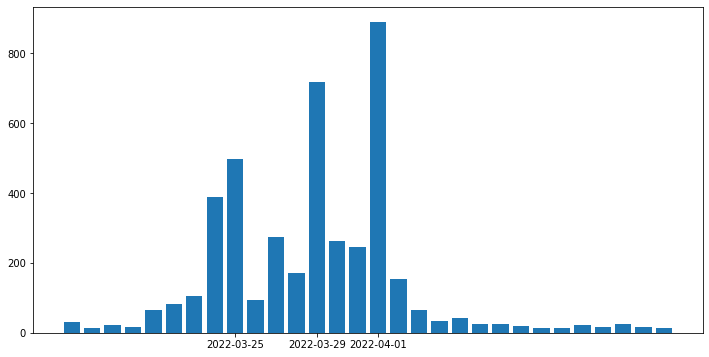

In [ ]:
plt.figure(figsize = (12, 6))
plt.bar((range(1205, 1235)), list(dist.values())[1205:1235])
plt.xticks([1213, 1217, 1220], ['2022-03-25', '2022-03-29', '2022-04-01'])
plt.show()

Let's see what happened those days.

In [ ]:
x = df[df['Datetime'].str.contains('2022-03-25')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%15 == 0):
    display(x['Text'][i])

'african last round fixtures tuesday march th h _senegal_ _egypt_ _nigeria_ _ghana_ h _algeria_ _cameroon_ _tunisia_ _mali_ _morocco_ _congo_ _kinshasa_'

'_speaking_head_ richard ofori the guys did well this is basically a new team a lot of things have changed when you compare the performance of the afcon to tonight s display hopefully we will win the second leg'

'who do you think it is a better goalkeeper for the super eagles rt for maduka okoye like for francis uzoho'

'not the most exciting game in the world for nigeria but at after minutes the super eagles have the advantage over ghana heading into the nd leg in abuja on tuesday'

'well done dennis good track back to clear the danger'

'fantastic save by wollacot to deny nigeria from taking the lead ghana _ghana_ nigeria _nigeria_'

'_ghana_ _nigeria_ _watch_ half time at the baba yara sports stadium ghana nigeria'

'_ghana_ _nigeria_ _watch_ holds play in the box to set abdul fatawu issahaku his shot is palmed away by the goalkeeper ghana _ghana_ _nigeria_ nigeria'

'kickoff is underway at the baba yara sports stadium ghana _ghana_ nigeria _nigeria_'

'algeria _algeria_ and tunisia _tunisia_ come up with massive road wins and are now in a great spot to qualify we give algeria an chance and tunisia an chance for fans hoping for a debutant a the world cup mali may have been the last hope'

'amazing atmosphere at cairo stadium as salah leads the pharaohs out for the warming up'

'on current form i believe nigeria will have a good game in kumasi against the black stars on friday today the year old former abiola babes star player who won the afcon silver medal with nigeria at algiers'

'difficult first half for moussa sissako of mali he scores an og at the th minute then is sent off after minutes of play half time mali _mali_ _tunisia_ tunisia'

'the stars are ready to set off to the baba yara stadium for the big game tonight _ghana_ we wish them all the best _folded_hands_ _camera_with_flash_ twitter'

'_uruguay_ _ecuador_ uruguay and ecuador are the latest nations to qualify for'

'cameroon vs algeria is going down _fire_ _fire_ _fire_ _fire_ _smiling_face_with_heart eyes_ _smiling_face_with_heart eyes_ _smiling_face_with_heart eyes_ _cameroon_ _algeria_ _cameroon_ _algeria_ _cameroon_ _algeria_ _camera_with_flash_'

'the girl only managed to get one soo excited _party_popper_ current views from cairo stadium _stadium_'

'ghanaians warm up the baba yara sports stadium ahead of clash _ghana_ _fire_ with the super eagles _eagle_ _eagle_ of nigeria _nigeria_ _nigeria_ _nigeria_'

'kick off at the martyrs of pentecost stadium in kinshasa dr congo vs morocco come on you leopards'

'today predict the scores and stand the chance of winning a box of from your favorite cupcake cookies and short bread brand _ghana_ _nigeria_'

'ghana must go ampa words from their own mouth so we are going to kofi kyereh'

'there is one man if he tweets about the black stars match ghana is losing can someone already hide his phone until after march kofi kyere baba yara sports stadium thomas partey'

'qualifiers which team is winning at the baba yara sports stadium'

'ready for today s game share your predictions with us t amp c apply'

'matchday first leg of world cup play offs between dr congo and morocco all about leaving kinshasa with a positive result ahead of the return leg in casablanca let us see what our players are made of in a hostile atmosphere _congo_ _kinshasa_ _morocco_'

'_red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _orange_square_ _red_square_ _red_square_ _red_square_ _red_square_ _orange_square_ _red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _red_square_ _green_square_ _red_square_ _red_square_ _red_square_ _orange_square_ _red_square_ _green_square_ _red_square_ _red_square_ _orange_square_ not today s it is just the italian flight to _italy_ _house_with_garden_'

'big day today what are your score predictions guys friendly _south_africa_ i _guinea_ guinea play off s dr congo _congo_ _kinshasa_ _morocco_ morocco cameroon _cameroon_ _algeria_ algeria mali _mali_ _tunisia_ tunisia egypt _egypt_ _senegal_ senegal ghana _ghana_ _nigeria_ nigeria'

'it is matchday come on super eagles _eagle_ _nigeria_ you super fantastic ever committed lads should go all out tonight and bring us victory from kumasi ghana let us get it done tonight _eagle_ _nigeria_ _folded_hands_ together we shall soarr _nigeria_ _eagle_ _nigeria_ _eagle_ _nigeria_ _eagle_ _folded_hands_'

'only river plate fan to get this much support from boca fans _goat_ _pleading_face_ here he playing his last match in argentina before _argentina_'

'produced one of the greatest upsets in world football registering a last gasp win to end italy s hopes of qualifying for fifa world cup'

'a win vs panama on sunday essentially qualifies the for the costa rica would need to make up goals of differential'

'could qualify for the world cup tonight for the first time since and the match is being called by announcers who are back in toronto'

'can someone who understands soccer futbol explain to me how a goalie can catch a ball bring it all the way into his own goal and for that not to count as a goal against his team'

'italy may break tonight italian soccer fans are heartbroken this is an upset for the ages wow soccer announcers are the greatest north macedonia italy italy is now out of the upcoming world cup'

**25/03/21**: On March 24, Italy was eliminated by Northern macedonia during World Cup qualifiers. Also, there are many tweets regarding the African teams.

In [ ]:
x = df[df['Datetime'].str.contains('2022-03-29')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%20 == 0):
    display(x['Text'][i])

'achraf hakimi celebrating with his countrymen morocco s _morocco_ qualification to the world cup _movie_camera_'

'_police_car_light_ _warning_ violence in senegal the home supporters clambered onto the pitch threatening the egyptian players after the end of the game'

'dortmund congratulates otto addo for a good job done qualifying the for'

'teams countries to represent africa at the two west african countries ghana _ghana_ senegal _senegal_ two north african countries tunisia _tunisia_ morocco _morocco_ one central african country cameroon _cameroon_'

'_cameroon_ _party_popper_ late late drama _face_screaming_in_fear_ cameroon secure their place at fifa world cup qatar _trade_mark_ in extra time with a last gasp goal against algeria'

'fans destroying the moshood abiola national stadium after nigeria failed to qualify for against ghana _ghana_'

'goal _soccer_ball_ slimani scores from a lovely cross to make it'

'_tunisia_ _raising_hands_ the eagles of carthage are fifa world cup qatar _trade_mark_ bound'

'inside the ghana _ghana_ locker room after qualifying for the world cup in qatar'

'yeap is going to the and what would it be without'

'_fire_ siiuu _flexed_biceps_ _portugal_ cristiano ronaldo will be in with portugal _check_mark_button_ _trophy_'

'_globe_showing_europe africa_ african cup of nations champions senegal amp ghana are the first two african countries to book their spots at the fifa world cup in qatar _stadium_ _senegal_ _handshake_ _ghana_'

'no matter how far we make it in the world cup the biggest victory is beating nigeria idc _partying_face_ _partying_face_ _partying_face_ _ghana_ _ghana_ _ghana_'

'goal _soccer_ball_ algeria _algeria_ cameroon _cameroon_ _soccer_ball_ eric maxim choupo moting aggregate'

'bags packed _airplane_ senegal and ghana are both through to the fifa world cup in qatar heartbreak for powerhouses egypt and nigeria'

'whoever is married to this man should come for free ohemaa and feminine cleanz one gallon o let us show him something _loudly_crying_face_ _loudly_crying_face_ _loudly_crying_face_ he did so well he deserves enjoyment pro max _new_moon_face_ _new_moon_face_'

'in other news it is penalties now between senegal and egypt who qualifies'

'do not worry victor osimhen we dey go wc together _hundred_points_ _double_exclamation_mark_ _weary_face_ _weary_face_ _weary_face_ _weary_face_'

'done and dusted great team work fantastic support _raising_hands_ next stop'

'joojo wollacot appreciation tweet my motm what a performance tonight'

'official ghana have qualified for the fifa world cup _ghana_ congratulations _ghana_ _ghana_ _ghana_'

'ghana have qualified for the world cup after eliminating bitter rivals nigeria _ghana_ _soccer_ball_ _fire_'

'no matter how high the eagle flies it cannot go beyond the stars _ghana_ _ghana_ black stars through to _partying_face_ _partying_face_'

'this is the scene if senegal and egypt matchsenegal fans are attacking opponent with laser lightsegyptian players are looking like ghosts _face_with_tears_of_joy_'

'who impressed you the most in the first half from osimhen'

'in the jollof derby william troost ekong levels from the penalty spot'

'made by debut on via today to put in perspective the wcq'

'_speaking_head_ augustine arhinful we should be careful the black stars should not sit back more we have to be discipline and be tactful'

'nigeria _nigeria_ do not know what is coming today _grinning_face_with_sweat_ let us go all out and make ghana _ghana_ proud _red_heart_ c mon black stars _fire_'

'definitely shooting our way to qatar tonight so help us god _folded_hands_'

'we go again today predict and win _wrapped_gift_ _soccer_ball_ what is your prediction of the super eagles of nigeria _nigeria_ and the black stars of ghana _ghana_ game tonight correct prediction gets a free shirt from drop predictions here _backhand_index_pointing_down_ _backhand_index_pointing_down_ retweet'

'_brazil_ and close out their qualifying campaign with a trip to bolivia this evening _brazil_'

'it is 𝗠𝗔𝗧𝗖𝗛𝗗𝗔𝗬 we will reach our goal with 𝗬𝗢𝗨𝗥 𝗦𝗨𝗣𝗣𝗢𝗥𝗧 _raised_fist_light_skin_tone_ first leg _congo_ _kinshasa_ _morocco_ _morocco_'

'time to raise high the flag of ghana _ghana_ go ghana go blackstars'

'this morning on studio the buildup to the clash between ghana amp nigeria is on _fire_ _ghana_ _nigeria_ i will be interactive with you all so send your messages to all platforms and let us talking'

'ep canada at failure amp preview _canada_ at st world cup since should mancini stay or go biggest problem no serie a reserve league loser of out of scudetto race listen here'

**29/03/2022**: Other tweets regarding African World Cup qualifiers.

In [ ]:
x = df[df['Datetime'].str.contains('2022-04-01')]
x.reset_index(inplace = True, drop = True)
for i in range(len(x)):
  if (i%20 == 0):
    display(x['Text'][i])

'can you explain why people think group b is easy for england england _england_ has a threatening front line but i cannot trust their defence line usa _united_states_ has a young and promising team iran _iran_ is the best team in asia and was really hard to beat in the last wc'

'i feel sad when some ghanaians behave as if iñaki williams has betrayed ghana _ghana_ i think we should applaud him for admitting he loves ghana it is not easy for him to play for different country because of his club is against their philosophy the case of yuri'

'ballon d or vs the best fifa men s player lionel messi vs robert lewandowski on the biggest stage _fire_ _fire_ _fire_ what is your favorite matchup in the group stage _eyes_'

'they are always harder for england than maybe if they would drawn another of the top seeds gareth southgate prepared for emotional game as he reacts to world cup draw'

'you think _thinking_face_ this squad will carry last in group h woyale _red_exclamation_mark_'

'the games have been decided _fire_ _star struck_ is your team going through _thinking_face_ group b first round st of november _england_ vs _iran_ _united_states_ vspo second round th of november _england_ vs _united_states_ _iran_ vspo third round th of november _england_ vspo _iran_ vs _united_states_'

'no one wants to be in s group of death but the group of death that really matters is the thousands of migrant workers who died of unexplained causes in'

'can we all just agree to fast forward seven and a half months of our lives cannot wait this is going to be incredible'

'luis suarez after ghana are drawn in the same group as uruguay suarez be like these mfs never get tired of taking wrong turns in the world'

'frenkie de jong and are in group a they will face senegal qatar and ecuador'

'would love england v usa on thanksgiving cannot wait for this tournament now'

'i love the game and still have passion i hope to play maybe four or five years'

'revising previous tweet confused wc amp euro format canada is in a very difficult group belgium is a powerhouse croatia was in the wc final amp morocco tied spain in top go thru a very tall order for _canada_ but they are a dangerous underdog'

'well happy with that draw could not ask for much more _england_'

'ghana go win the world cup and ego shock everybody _ghana_ _ghana_ _ghana_ _red_heart_ _red_heart_ _red_heart_'

'which group is the group of death group c for me'

'group b has plenty of interesting matchups _eyes_ england could have a potential home nations clash against wales or scotland watch now _backhand_index_pointing_right_ live blog _backhand_index_pointing_right_'

'iran will open their campaign against england the sides have never met in a senior international but will now go head to head in their opening game it also means another world cup match up between the us and iran who met at france'

'i like how we are all so very excited by that in our privilege we deliberately ignore human rights abuses that are as significant as s abuses and really why should slave labour get in the way of our enjoyment'

'when he gets to with yunus musah will join a list of legends who have represented their countries in the world cup in a unique way yunus m _united_states_ h carl _spain_ uyol stev _england_ errard _germany_ d müller _france_ nck ribéry'

'_police_car_light_ the draw result is here _qatar_ _collision_ group d _france_ france _denmark_ denmark _tunisia_ tunisia _blue_circle_ play off perauseau'

'between ghana and cameroon who would you put your money on to go through'

'this is your heads up that ya boy will be mia on november th because it is coming home'

'ronaldo and ghana again ei _face_with_tears_of_joy_ and might forever mooree _face_with_tears_of_joy_ _folded_hands_ _ghana_ we move _fire_'

'canada to be grouped with belgium morocco and croatia at _canada_ call me crazy but i like this draw'

'what a group that is alexa play it is coming home _england_'

'just in usa s group for the group b _england_ england _iran_ iran _united_states_ usa euro playoff winner wales v scotlandukraine days away november st dec th'

'decent draw for afcon champions i can see senegal getting to the next round of the world cup from the group _flexed_biceps_medium_skin_tone_'

'group b is almost complete _england_ england _united_states_ usa _iran_ iran _keycap__'

'argentina could play france or denmark in the round of at the world cup'

'qatar in group a and england in group b argentina in group c'

'jermaine jenas really went from relegation with qpr in to hosting the world cup draw glow up _face_with_tears_of_joy_'

'players we have lost since maradona muller rossi banks rest in peace legends'

'is going to be the greatest show on earth the world s best world cup'

'someone said this is the ghost of all the migrant workers who died building stadiums in cruel conditions for the world cup in qatar'

'england fans do you feel confident who do you want to get in the draw _thinking_face_ _television_ watch live on and listen on _mobile_phone_with_arrow_'

'expose and boycott the corrupt criminals and their enablers who are responsible for workers deaths in pay their families from the qatari multi million bribes maybe families of qatar s dead migrant workers left with nothing'

'build up you have got the final say use the and let us have your predictions as you stand a chance of winning an airtime _star struck_'

'who will be in qatar s _qatar_ group at the world cup leave your guesses in the replies _backhand_index_pointing_down_'

'_soccer_ball_ the awarding of the to _qatar_ was a decision shrouded in controversy ever since the initial announcement in france s reports on the legacy of scandal and intrigue which surrounds the games _right_arrow_curving_down_'

'degs today in doha as i explain how the draw works for check it out later and it will be hotting up when the draw is made for and it is live on drive with me and andy townsend at the draw and back home'

'april fools is the worst it is not funny gm _hot_beverage_ today is the day we find out the groups'

'as the world tunes in to the draw today what is there to know about the human cost of the stadiums a quick breakdown of some of the allegations covered in our tracker _thread_'

'feels so good to know that davido is part of this greatness representing africa in the official fifa world cup qatar song mehn this is so big _thumbs_up_ _red_heart_ enjoy via _backhand_index_pointing_down_ _backhand_index_pointing_down_'

'raphinha what a player what a talent in _brazil_ we did not really know him because he left europe at a very young age now you can see his performances for leeds and when he was called up to the national team you can see the impact kaka'

**01/04/2022**: World Cup groups draw.